# Simulated Annealing Demo

Skrypt przedstawia przykładową implementację algorytmu symulowanego wyżarzania (ang. Simulated Annealing, SA) i jego zastosowanie do rozwiązywania problemu Quadratic Assignment Problem (QAP). Problem jest dokładnie opisany m.in. w pracy Burkarda i innych [1]. Popularne instancje problemu QAP można znaleźć w bibliotece QAPLib [2]. Skrypt skupia się na rozwiązywaniu instancji NUG12 [3], w celu rozwiązywania innych instancji może okazać się konieczna zmiana ustawień parametrów algorytmu.

Literatura:

[1]  Burkard, R., Cela, E., Pardalos, P., Pitsoulis, L., "The Quadratic Assignment Problem", http://citeseerx.ist.psu.edu/viewdoc/summary?doi=10.1.1.217.1914

[2] QAPLIB, http://anjos.mgi.polymtl.ca/qaplib/

[3] NUG12, http://anjos.mgi.polymtl.ca/qaplib/data.d/nug12.dat

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
import urllib.request

%matplotlib inline

In [303]:
QAP_INSTANCE_URL = 'http://anjos.mgi.polymtl.ca/qaplib/data.d/nug20.dat'

## Reading input data

In [304]:
qap_instance_file = urllib.request.urlopen(QAP_INSTANCE_URL)

line = qap_instance_file.readline()
n = int(line.decode()[:-1].split()[0])
print('Problem size: %d' % n)

A = np.empty((n, n))
qap_instance_file.readline()
for i in range(n):
    line = qap_instance_file.readline()
    A[i, :] = list(map(int, line.decode()[:-1].split()))
print('Flow matrix:\n', A)

B = np.empty((n, n))
qap_instance_file.readline()
for i in range(n):
    line = qap_instance_file.readline()
    B[i, :] = list(map(int, line.decode()[:-1].split()))
print('Distance matrix:\n', B)

Problem size: 20
Flow matrix:
 [[ 0.  1.  2.  3.  4.  1.  2.  3.  4.  5.  2.  3.  4.  5.  6.  3.  4.  5.
   6.  7.]
 [ 1.  0.  1.  2.  3.  2.  1.  2.  3.  4.  3.  2.  3.  4.  5.  4.  3.  4.
   5.  6.]
 [ 2.  1.  0.  1.  2.  3.  2.  1.  2.  3.  4.  3.  2.  3.  4.  5.  4.  3.
   4.  5.]
 [ 3.  2.  1.  0.  1.  4.  3.  2.  1.  2.  5.  4.  3.  2.  3.  6.  5.  4.
   3.  4.]
 [ 4.  3.  2.  1.  0.  5.  4.  3.  2.  1.  6.  5.  4.  3.  2.  7.  6.  5.
   4.  3.]
 [ 1.  2.  3.  4.  5.  0.  1.  2.  3.  4.  1.  2.  3.  4.  5.  2.  3.  4.
   5.  6.]
 [ 2.  1.  2.  3.  4.  1.  0.  1.  2.  3.  2.  1.  2.  3.  4.  3.  2.  3.
   4.  5.]
 [ 3.  2.  1.  2.  3.  2.  1.  0.  1.  2.  3.  2.  1.  2.  3.  4.  3.  2.
   3.  4.]
 [ 4.  3.  2.  1.  2.  3.  2.  1.  0.  1.  4.  3.  2.  1.  2.  5.  4.  3.
   2.  3.]
 [ 5.  4.  3.  2.  1.  4.  3.  2.  1.  0.  5.  4.  3.  2.  1.  6.  5.  4.
   3.  2.]
 [ 2.  3.  4.  5.  6.  1.  2.  3.  4.  5.  0.  1.  2.  3.  4.  1.  2.  3.
   4.  5.]
 [ 3.  2.  3.  4.  5.  2.  1.  2. 

## Objective function

In [296]:
def qap_objective_function(p):
    s = 0.0
    for i in range(n):
        s += (A[i, :] * B[p[i], p]).sum()
    return s

In [7]:
p = [11, 6, 8, 2, 3, 7, 10, 0, 4, 5, 9, 1]
print(qap_objective_function(p), p)

578.0 [11, 6, 8, 2, 3, 7, 10, 0, 4, 5, 9, 1]


## Random Sampling

In [18]:
t0 = time.time()

T = 1000000

permutations = np.empty((T, n), dtype=np.int64)
costs = np.zeros(T)
for i in range(T):
    permutations[i, :] = np.random.permutation(n)
    costs[i] = qap_objective_function(permutations[i, :])

print(time.time() - t0)

p = permutations[costs.argmin(), :]
print(qap_objective_function(p), p)

91.10503506660461
600.0 [ 4  5 11  3  9  6 10  7  1  2  8  0]


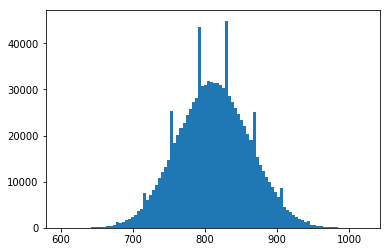

812.042104 49.7998116789


In [19]:
plt.figure()
plt.hist(costs, bins=100)
plt.show()

print(costs.mean(), costs.std())

## Simulated Annealing

In [297]:
def random_neighbor(p, radius):
    q = p.copy()
    for r in range(radius):
        i, j = np.random.choice(n, 2, replace=False)
        q[i], q[j] = q[j], q[i]
    return q

In [22]:
# nug12

T = 500000
radius = 1
alpha = 1.0

t0 = time.time()

p = np.random.permutation(n)
p_cost = qap_objective_function(p)
costs = np.zeros(T)
for t in range(T):
    q = random_neighbor(p, radius)
    q_cost = qap_objective_function(q)
    if(q_cost < p_cost):
        p, p_cost = q, q_cost
    elif(np.random.rand() < np.exp(- alpha * (q_cost - p_cost) * t/T)):
        p, p_cost = q, q_cost
    costs[t] = p_cost

print(time.time() - t0, costs.min())

65.2723114490509 578.0


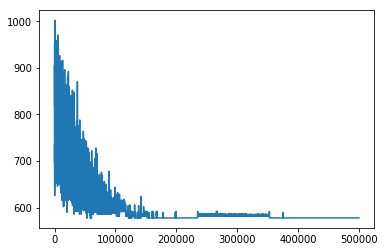

In [23]:
plt.figure()
plt.plot(costs)
plt.show()



# Zad1 a)

86.36687564849854 1610.0


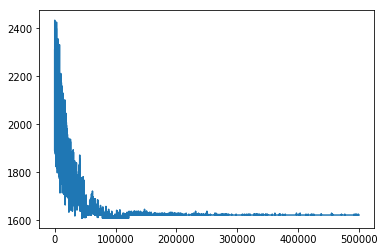

In [28]:
#nug16a
#OPT : 1610

T = 500000
radius = 1
alpha = 1.2

t0 = time.time()

p = np.random.permutation(n)
p_cost = qap_objective_function(p)
costs = np.zeros(T)
for t in range(T):
    q = random_neighbor(p, radius)
    q_cost = qap_objective_function(q)
    if(q_cost < p_cost):
        p, p_cost = q, q_cost
    elif(np.random.rand() < np.exp(- alpha * (q_cost - p_cost) * t/T)):
        p, p_cost = q, q_cost
    costs[t] = p_cost

print(time.time() - t0, costs.min())

plt.figure()
plt.plot(costs)
plt.show()


84.62534546852112 1734.0


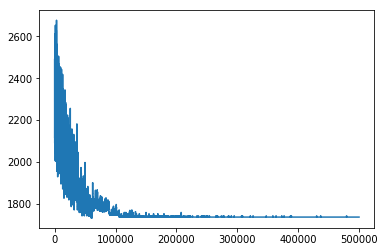

In [298]:
#Nug17
#OPT : 1732

T = 500000
radius = 1
alpha = 1.0

t0 = time.time()

p = np.random.permutation(n)
p_cost = qap_objective_function(p)
costs = np.zeros(T)
for t in range(T):
    q = random_neighbor(p, radius)
    q_cost = qap_objective_function(q)
    if(q_cost < p_cost):
        p, p_cost = q, q_cost
    elif(np.random.rand() < np.exp(- alpha * (q_cost - p_cost) * t/T)):
        p, p_cost = q, q_cost
    costs[t] = p_cost

print(time.time() - t0, costs.min())

plt.figure()
plt.plot(costs)
plt.show()


117.96211814880371 3488.0


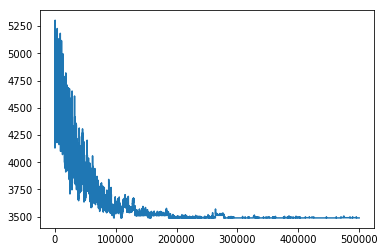

In [35]:
#Nug24
#OPT : 3488

T = 500000
radius = 1
alpha = 0.5

t0 = time.time()

p = np.random.permutation(n)
p_cost = qap_objective_function(p)
costs = np.zeros(T)
for t in range(T):
    q = random_neighbor(p, radius)
    q_cost = qap_objective_function(q)
    if(q_cost < p_cost):
        p, p_cost = q, q_cost
    elif(np.random.rand() < np.exp(- alpha * (q_cost - p_cost) * t/T)):
        p, p_cost = q, q_cost
    costs[t] = p_cost

print(time.time() - t0, costs.min())

plt.figure()
plt.plot(costs)
plt.show()


# Zad4 d)

In [27]:
def permutation_distance(p, q):
    return (p != q).sum()

62.332595109939575 578.0
114.11358189582825 582.0
147.55853748321533 586.0
163.42869091033936 578.0


/home/satyr/anaconda2/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice.
/home/satyr/anaconda2/envs/py3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


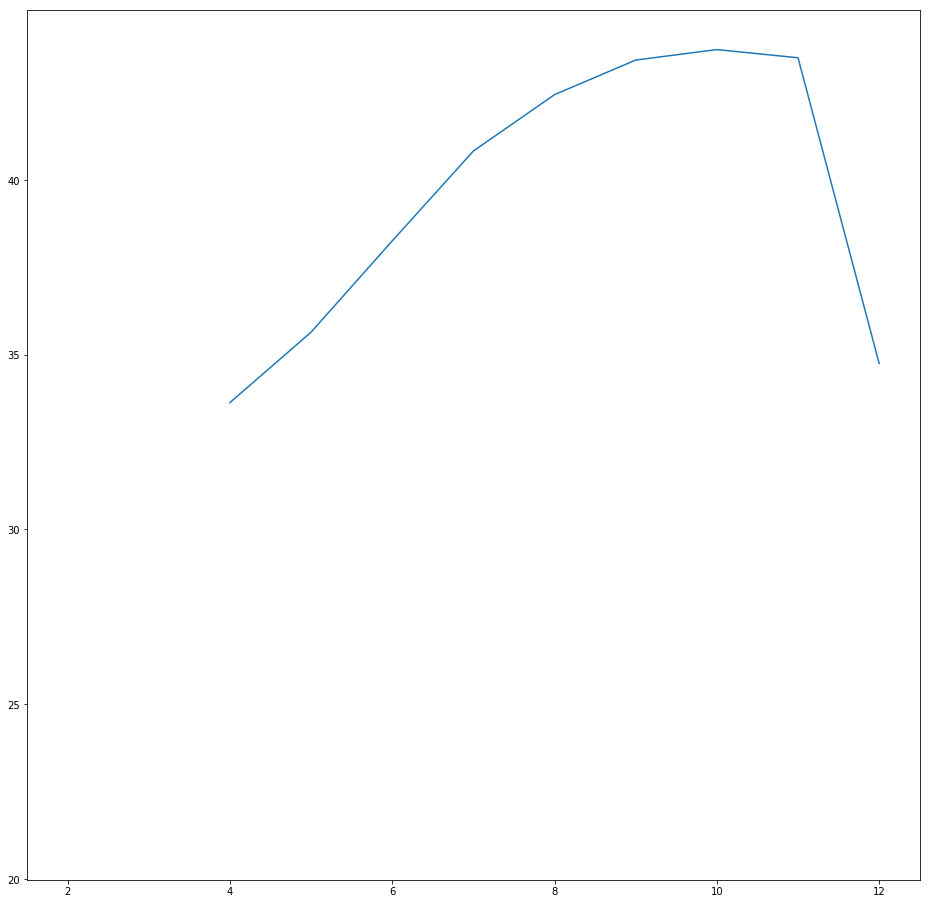

In [29]:
#Nug12
#OPT : 1930

radiuses = [1, 3, 5, 7]
alpha = 1.0
diffs = [[] for _ in range(24)]

plt.figure(figsize=(16,16))

for radius in radiuses:

    T = 500000
    
    t0 = time.time()

    p = np.random.permutation(n)
    p_cost = qap_objective_function(p)
    costs = np.zeros(T)
    for t in range(T):
        q = random_neighbor(p, radius)
        q_cost = qap_objective_function(q)
        if(q_cost < p_cost):
            diffs[int(permutation_distance(p,q))].append(p_cost - q_cost)
            p, p_cost = q, q_cost
            
        elif(np.random.rand() < np.exp(- alpha * (q_cost - p_cost) * t/T)):
            p, p_cost = q, q_cost
        costs[t] = p_cost

    print(time.time() - t0, costs.min())


diff_means = [np.array(d).mean() for d in diffs if len(d) > 10]
plt.plot(diff_means)
plt.show()


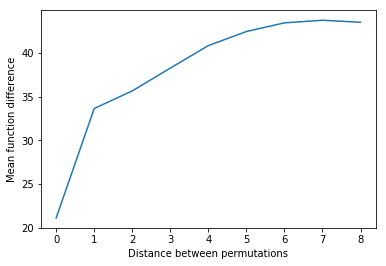

In [42]:
diff_means = [np.array(d).mean() for d in diffs if len(d) > 10]
plt.plot(diff_means)
plt.ylabel("Mean objective function difference")
plt.xlabel("Distance between permutations")
plt.show()


# Zad1 e)

8.845723152160645 2650.0


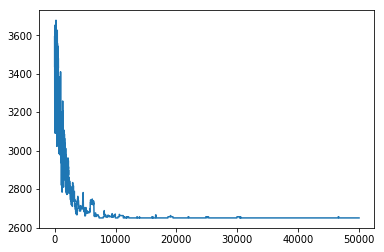

In [308]:
#nug20 Standard
#OPT : 2570

T = 50000
radius = 1
alpha = 1.2

t0 = time.time()

p = np.random.permutation(n)
p_cost = qap_objective_function(p)
costs = np.zeros(T)
for t in range(T):
    q = random_neighbor(p, radius)
    q_cost = qap_objective_function(q)
    if(q_cost < p_cost):
        p, p_cost = q, q_cost
    elif(np.random.rand() < np.exp(- alpha * (q_cost - p_cost) * t/T)):
        p, p_cost = q, q_cost
    costs[t] = p_cost

print(time.time() - t0, costs.min())

plt.figure()
plt.plot(costs)
plt.show()


8.574538707733154 2810.0


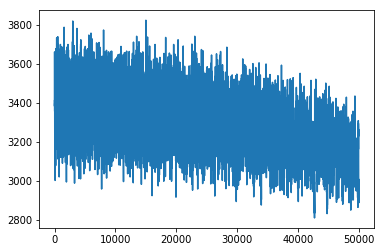

In [309]:
#nug20 simulated reannealing, exponential cooling
#OPT : 2570

T = 50000
temperature = 500
radius = 1
c1 = 0.99995

t0 = time.time()

p = np.random.permutation(n)
p_cost = qap_objective_function(p)
costs = np.zeros(T)
for t in range(T):
    q = random_neighbor(p, radius)
    q_cost = qap_objective_function(q)
    if(q_cost < p_cost):
        p, p_cost = q, q_cost
    elif(np.random.rand() < np.exp((p_cost - q_cost)/temperature )):
        p, p_cost = q, q_cost
    costs[t] = p_cost
    temperature *= c1
    
print(time.time() - t0, costs.min())

plt.figure()
plt.plot(costs)
plt.show()


9.488937616348267 2602.0


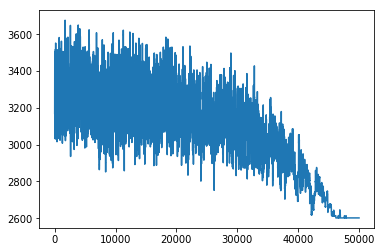

In [310]:
#nug20 simulated reannealing, linear cooling
#OPT : 2570

T = 50000
temperature = 100
radius = 1
c1 = float(temperature)/T

t0 = time.time()

p = np.random.permutation(n)
p_cost = qap_objective_function(p)
costs = np.zeros(T)
for t in range(T):
    q = random_neighbor(p, radius)
    q_cost = qap_objective_function(q)
    if(q_cost < p_cost):
        p, p_cost = q, q_cost
    elif(np.random.rand() < np.exp((p_cost - q_cost)/temperature )):
        p, p_cost = q, q_cost
    costs[t] = p_cost
    temperature -= c1
    
print(time.time() - t0, costs.min())

plt.figure()
plt.plot(costs)
plt.show()


105.18690776824951 3528.0


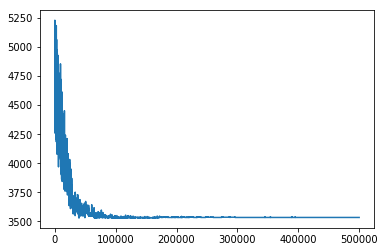

In [113]:
#nug24 Standard
#OPT : 3488

T = 500000
radius = 1
alpha = 1.2

t0 = time.time()

p = np.random.permutation(n)
p_cost = qap_objective_function(p)
costs = np.zeros(T)
for t in range(T):
    q = random_neighbor(p, radius)
    q_cost = qap_objective_function(q)
    if(q_cost < p_cost):
        p, p_cost = q, q_cost
    elif(np.random.rand() < np.exp(- alpha * (q_cost - p_cost) * t/T)):
        p, p_cost = q, q_cost
    costs[t] = p_cost

print(time.time() - t0, costs.min())

plt.figure()
plt.plot(costs)
plt.show()


97.07959628105164 3488.0


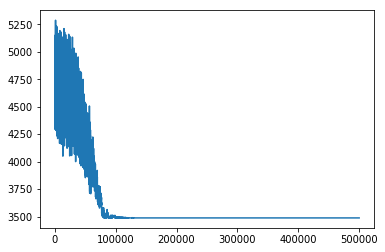

In [114]:
#nug24 simulated reannealing, exponential cooling
#OPT : 3488

T = 500000
temperature = 500
radius = 1
c1 = 0.99995

t0 = time.time()

p = np.random.permutation(n)
p_cost = qap_objective_function(p)
costs = np.zeros(T)
for t in range(T):
    q = random_neighbor(p, radius)
    q_cost = qap_objective_function(q)
    if(q_cost < p_cost):
        p, p_cost = q, q_cost
    elif(np.random.rand() < np.exp((p_cost - q_cost)/temperature )):
        p, p_cost = q, q_cost
    costs[t] = p_cost
    temperature *= c1
    
print(time.time() - t0, costs.min())

plt.figure()
plt.plot(costs)
plt.show()


95.26470136642456 3488.0


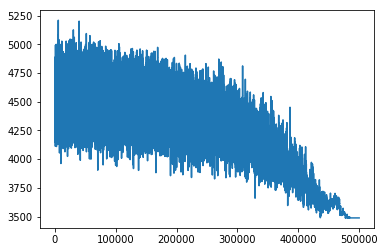

In [115]:
#nug24 simulated reannealing, linear cooling
#OPT : 3488

T = 500000
temperature = 100
radius = 1
c1 = float(temperature)/T

t0 = time.time()

p = np.random.permutation(n)
p_cost = qap_objective_function(p)
costs = np.zeros(T)
for t in range(T):
    q = random_neighbor(p, radius)
    q_cost = qap_objective_function(q)
    if(q_cost < p_cost):
        p, p_cost = q, q_cost
    elif(np.random.rand() < np.exp((p_cost - q_cost)/temperature )):
        p, p_cost = q, q_cost
    costs[t] = p_cost
    temperature -= c1
    
print(time.time() - t0, costs.min())

plt.figure()
plt.plot(costs)
plt.show()


# Zad2 a)

In [301]:
def eval_population_onemax(ppl):
    return ppl.sum(axis=1)

def eval_population_deceptive_onemax(ppl):
    s = ppl.sum(axis=1)
    s[s == 0 ] = ppl.shape[1] + 1
    return s

def eval_population_k_deceptive_onemax(ppl):
    k=5
    ppl = ppl.reshape(ppl.shape[0],k,-1)
    s = ppl.sum(axis=2)
    s[s == 0 ] = ppl.shape[2] + 1
    s = s.sum(axis=1)
    return s 

def random_population(N, ppbs):
    return (np.random.rand(N, ppbs.shape[0]) < ppbs).astype(float)
    

def PBIL(N, d, F, theta1, theta2, theta3, iters=1000, log_every=0):
    maxes = []
    ppbs = np.array([0.5] * d)
    population = random_population(N, ppbs)
    eval_vector = F(population)
    
    for i in range(iters):
        best_x = population[np.argmax(eval_vector)]
        ppbs = ppbs * (1.0-theta1) + best_x*theta1
        ppbs = ppbs - ((np.random.rand(d) < theta2)).astype(float)  \
            * (ppbs*theta3 - (np.random.rand(d) < 0.5).astype(float)*theta3)
        #for k in range(d):
            #if np.random.rand() < theta2:
                #ppbs[k] = ppbs[k] * (1-theta3) + float((np.random.rand() < 0.5))*theta3
        population = random_population(N, ppbs)
        eval_vector = F(population)
        maxes.append(eval_vector.max())
        if log_every != 0 and i % log_every == 0:
            print("Iteration: " + str(i) + ". Current max: " + str(max(maxes)))
    
    return population, np.array(maxes)

OneMax problem:


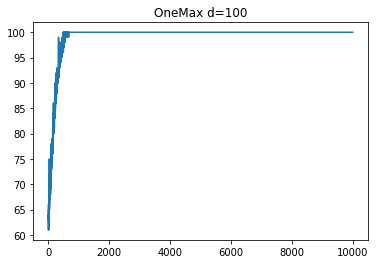

max:100.0


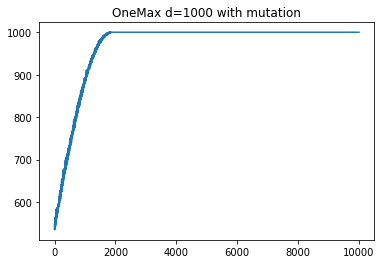

max:1000.0


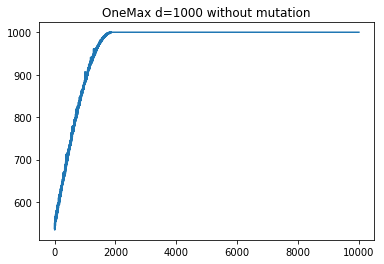

max:1000.0
Deceptive OneMax problem:


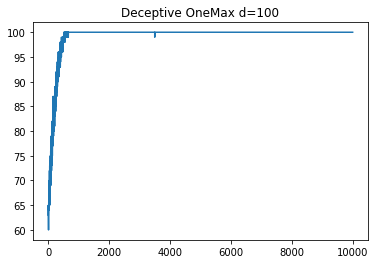

max:100.0


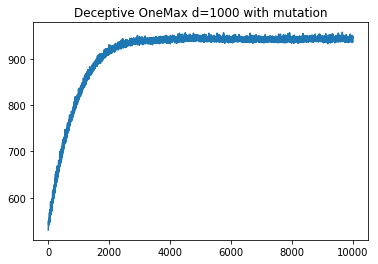

max:957.0


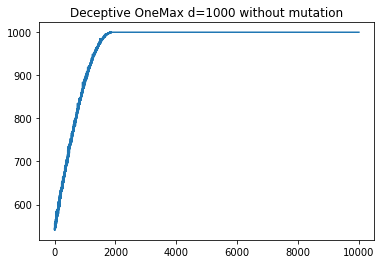

max:1000.0
5-Deceptive OneMax problem:


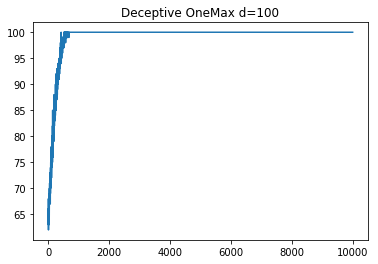

max:100.0


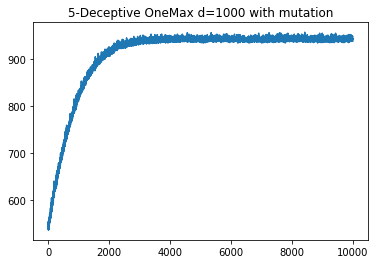

max:957.0


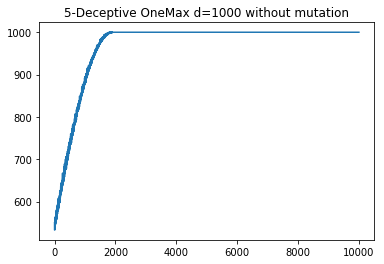

max:1000.0


In [302]:
print("OneMax problem:")
p, m = PBIL(125, 100, eval_population_onemax, 0.01, 0.05, 0.01, iters=10000)
ff = plt.figure()
plt.plot(m)
plt.title('OneMax d=100')
plt.show()
print('max:' + str(max(m)))

p, m = PBIL(125, 1000, eval_population_onemax, 0.01, 0.00, 0.01, iters=10000)
plt.figure()
plt.plot(m)
plt.title('OneMax d=1000 with mutation')
plt.show()
print('max:' + str(max(m)))

p, m = PBIL(125, 1000, eval_population_onemax, 0.01, 0.00, 0.01, iters=10000)
plt.figure()
plt.plot(m)
plt.title('OneMax d=1000 without mutation')
plt.show()
print('max:' + str(max(m)))

print("Deceptive OneMax problem:")
p, m = PBIL(125, 100, eval_population_deceptive_onemax, 0.01, 0.05, 0.01, iters=10000)
ff = plt.figure()
plt.plot(m)
plt.title('Deceptive OneMax d=100')
plt.show()
print('max:' + str(max(m)))
    
p, m = PBIL(125, 1000, eval_population_deceptive_onemax, 0.01, 0.05, 0.01, iters=10000)
plt.figure()
plt.plot(m)
plt.title('Deceptive OneMax d=1000 with mutation')
plt.show()
print('max:' + str(max(m)))

p, m = PBIL(125, 1000, eval_population_deceptive_onemax, 0.01, 0.00, 0.01, iters=10000)
plt.figure()
plt.plot(m)
plt.title('Deceptive OneMax d=1000 without mutation')
plt.show()
print('max:' + str(max(m)))
    
print("5-Deceptive OneMax problem:")
p, m = PBIL(125, 100, eval_population_k_deceptive_onemax, 0.01, 0.05, 0.01, iters=10000)
ff = plt.figure()
plt.plot(m)
plt.title('Deceptive OneMax d=100')
plt.show()
print('max:' + str(max(m)))
    
p, m = PBIL(125, 1000, eval_population_k_deceptive_onemax, 0.01, 0.05, 0.01, iters=10000)
plt.figure()
plt.plot(m)
plt.title('5-Deceptive OneMax d=1000 with mutation')
plt.show()
print('max:' + str(max(m)))

p, m = PBIL(125, 1000, eval_population_k_deceptive_onemax, 0.01, 0.00, 0.01, iters=10000)
plt.figure()
plt.plot(m)
plt.title('5-Deceptive OneMax d=1000 without mutation')
plt.show()
print('max:' + str(max(m)))

# Zad 3

Iteration: 0. Current max: 8578.0
Iteration: 20. Current max: 8864.0
Iteration: 40. Current max: 9032.0
Iteration: 60. Current max: 9130.0
Iteration: 80. Current max: 9130.0
Iteration: 100. Current max: 9151.0
Iteration: 120. Current max: 9162.0
Iteration: 140. Current max: 9162.0
Iteration: 160. Current max: 9166.0
Iteration: 180. Current max: 9175.0
Iteration: 200. Current max: 9175.0
Iteration: 220. Current max: 9179.0
Iteration: 240. Current max: 9186.0
Iteration: 260. Current max: 9192.0
Iteration: 280. Current max: 9192.0
Iteration: 300. Current max: 9192.0
Iteration: 320. Current max: 9192.0
Iteration: 340. Current max: 9193.0
Iteration: 360. Current max: 9193.0
Iteration: 380. Current max: 9197.0
Iteration: 400. Current max: 9197.0
Iteration: 420. Current max: 9198.0
Iteration: 440. Current max: 9198.0
Iteration: 460. Current max: 9199.0
Iteration: 480. Current max: 9199.0
Iteration: 500. Current max: 9201.0
Iteration: 520. Current max: 9201.0
Iteration: 540. Current max: 9201.

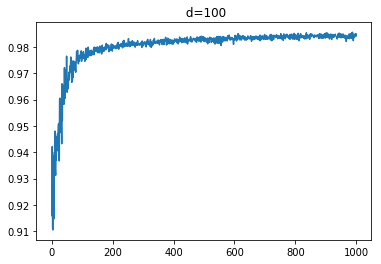

max:0.985561497326
time: 3082.592123031616


In [293]:
def eval_classification_loss(ppl):
    # ppl is N x 266
    # returns eval_vector 1xN
    eval_vector = np.empty(ppl.shape[0])
    for i in range(ppl.shape[0]):
        classes = []
        C = (classifs.T * ppl[i]).astype(int)
        for px in range(9350):
            classes.append(np.argmax(np.bincount(C[px])[1:]) + 1)
        eval_vector[i] = (np.array(classes) == experts).sum()
    return eval_vector
    
experts = np.empty((1, 9350))
classifs = np.empty((266, 9350))

for i,l in enumerate(open("lista01/ImageExpertReduced.txt", 'r')):
    experts[:] = [float(x) for x in l.split()]
    
for i,l in enumerate(open("lista01/ClassificationRules.txt", 'r')):
    classifs[i] = [float(x) for x in l.split()]
    

t0 = time.time()
p, m = PBIL(50, 266, eval_classification_loss, 0.025, 0.05, 0.01, iters=1000, log_every=20)
plt.figure()
plt.plot(m/9350.0)
plt.title(' d=100')
plt.show()
print('max:' + str(max(m)/9350.0))
print('time: ' + str(time.time() - t0))

# Zad 4

In [271]:
def random_continuous_population(N, ppbs, stdev):
    return np.random.normal(0, stdev, (N, ppbs.shape[0])) + ppbs       

def PBIL_continuous(N, d, F, theta1, theta2, theta3, stdev, iters=1000, log_every=0):
    maxes = []
    ppbs = np.array([0.5] * d)
    population = random_continuous_population(N, ppbs, stdev)
    eval_vector = F(population)
    
    for i in range(iters):
        best_x = population[np.argmax(eval_vector)]
        ppbs = ppbs * (1.0-theta1) + best_x*theta1
        ppbs = ppbs - ((np.random.rand(d) < theta2)).astype(float)  \
            * (ppbs*theta3 - (np.random.rand(d) < 0.5).astype(float)*theta3)

        population = random_continuous_population(N, ppbs, stdev)
        eval_vector = F(population)
        stdev *= 0.99
        theta1 *= 0.999
        
        maxes.append(eval_vector.max())
        if log_every != 0 and i % log_every == 0:
            print("Iteration: " + str(i) + ". Current max: " + str(max(maxes)/9350.0))
    
    return ppbs, maxes

Iteration: 0. Current max: 0.911657754011
Iteration: 5. Current max: 0.962245989305
Iteration: 10. Current max: 0.962245989305
Iteration: 15. Current max: 0.962245989305
Iteration: 20. Current max: 0.969518716578
Iteration: 25. Current max: 0.969518716578
Iteration: 30. Current max: 0.972406417112
Iteration: 35. Current max: 0.973368983957
Iteration: 40. Current max: 0.976684491979
Iteration: 45. Current max: 0.976684491979
Iteration: 50. Current max: 0.977219251337
Iteration: 55. Current max: 0.977326203209
Iteration: 60. Current max: 0.977326203209
Iteration: 65. Current max: 0.97743315508
Iteration: 70. Current max: 0.97935828877
Iteration: 75. Current max: 0.979572192513
Iteration: 80. Current max: 0.979572192513
Iteration: 85. Current max: 0.979679144385
Iteration: 90. Current max: 0.979679144385
Iteration: 95. Current max: 0.981176470588


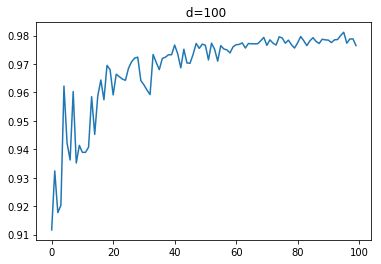

max:0.981176470588
time: 265.61425828933716


In [280]:
experts = np.empty((1, 9350))
classifs = np.empty((266, 9350))

for i,l in enumerate(open("lista01/ImageExpertReduced.txt", 'r')):
    experts[:] = [float(x) for x in l.split()]
    
for i,l in enumerate(open("lista01/ClassificationRules.txt", 'r')):
    classifs[i] = [float(x) for x in l.split()]

experts = experts.astype(int)
classifs = classifs.astype(int)

def eval_continuous(ppl):
    eval_vec = []
    for sample in range(ppl.shape[0]):
        #print(sample)
        predictions = np.zeros((9350, 3))
        for c in range(266):
            predictions[np.arange(9350), classifs[c, :]-1] += ppl[sample, c]
            
        #print(predictions.max(axis=1))
        correct_num = ((predictions.argmax(axis=1) + 1) == experts).sum()
        eval_vec.append(correct_num)
    return np.array(eval_vec)
        

t0 = time.time()
p, m = PBIL_continuous(50, 266, eval_continuous, 0.04, 0.05, 0.04, 0.6, iters=100,log_every=5)
plt.figure()
plt.plot(np.array(m)/9350.0)
plt.title(' d=100')
plt.show()
print('max:' + str(max(m)/9350.0))
print('time: ' + str(time.time() - t0))


Iteration: 0. Current max: 0.922459893048
Iteration: 20. Current max: 0.973796791444
Iteration: 40. Current max: 0.97614973262
Iteration: 60. Current max: 0.977647058824
Iteration: 80. Current max: 0.980748663102
Iteration: 100. Current max: 0.980748663102
Iteration: 120. Current max: 0.980748663102
Iteration: 140. Current max: 0.981711229947
Iteration: 160. Current max: 0.982673796791
Iteration: 180. Current max: 0.982673796791
Iteration: 200. Current max: 0.982673796791
Iteration: 220. Current max: 0.982673796791
Iteration: 240. Current max: 0.982887700535
Iteration: 260. Current max: 0.98320855615
Iteration: 280. Current max: 0.98320855615
Iteration: 300. Current max: 0.984064171123
Iteration: 320. Current max: 0.984064171123
Iteration: 340. Current max: 0.984064171123
Iteration: 360. Current max: 0.984598930481
Iteration: 380. Current max: 0.984598930481
Iteration: 400. Current max: 0.984705882353
Iteration: 420. Current max: 0.984705882353
Iteration: 440. Current max: 0.9847058823

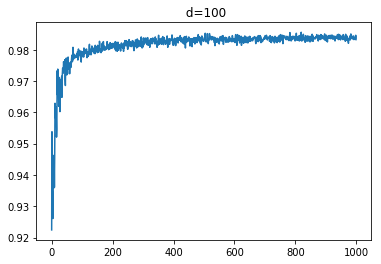

max:0.985561497326
time: 2642.2805461883545


In [281]:
t0 = time.time()
p, m = PBIL_continuous(50, 266, eval_continuous, 0.04, 0.05, 0.02, 0.6, iters=1000,log_every=20)
plt.figure()
plt.plot(np.array(m)/9350.0)
plt.title(' d=100')
plt.show()
print('max:' + str(max(m)/9350.0))
print('time: ' + str(time.time() - t0))